In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('BA_reviews.csv')
df = df.drop('Unnamed: 0',axis =1)

In [3]:
df.head()

,reviews
0,✅ Trip Verified | London Heathrow to Male In...
1,Not Verified | Very good flight following an ...
2,Not Verified | An hour's delay due to late ar...
3,✅ Trip Verified | I booked through BA becaus...
4,✅ Trip Verified | British airways lost bags ...


# Data Cleaning Phase

In [4]:
import re
import nltk
from nltk.corpus import stopwords

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
stop_words = set(stopwords.words('english'))

In [7]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+','',text) # Remove numbers
    text = re.sub(r'[^\w\s]','',text) # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words]) # Remove stopwords
    return text

In [8]:
df['cleaned_review'] = df['reviews'].apply(clean_text)
df = df.drop('reviews',axis = 1)

In [9]:
df.head()

,cleaned_review
0,trip verified london heathrow male new busines...
1,verified good flight following equally good fl...
2,verified hours delay due late arrival incoming...
3,trip verified booked ba loganair dont represen...
4,trip verified british airways lost bags lhr fo...


# Sentiment Analysis

In [10]:
# We can determine whether a review is positive, negative, or neutral using VADER.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jay\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
def remove_verified(text):
    return text.replace('trip verified','').replace('verified','')

In [12]:
df['cleaned_review'] = df['cleaned_review'].apply(remove_verified)

In [22]:
df['sentiment'] = df['cleaned_review'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x>0.05 else('Negative' if x <-00.5 else 'Neutral'))

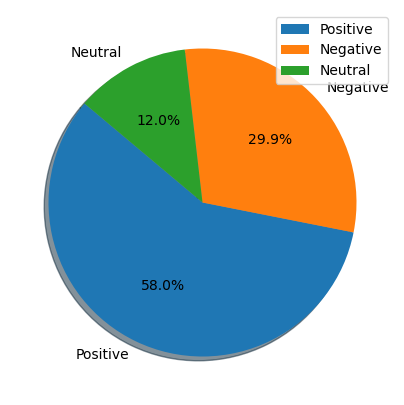

In [86]:
plt.figure(figsize=(5, 5))  # Reduce size
plt.pie(df['sentiment_label'].value_counts(),labels=df['sentiment_label'].value_counts().index,autopct='%1.1f%%', startangle=140, shadow=True)
plt.legend()
plt.show()

In [24]:
df.head(3)

,cleaned_review,sentiment,sentiment_label
0,london heathrow male new business class ba co...,0.9846,Positive
1,good flight following equally good flight rom...,0.8271,Positive
2,hours delay due late arrival incoming aircraf...,0.8442,Positive


## Topic Modelling (LDA)

### Latent Dirichlet Allocation (LDA) helps find major themes in the reviews.

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Converting text to numerical into vectors
vectorizer = CountVectorizer(max_features=500,stop_words='english')
X = vectorizer.fit_transform(df['cleaned_review'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=50)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=50)

## Creating chart of words frequency counts

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Jay\AppData\Local\Temp\ipykernel_20336\3623652930.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='words', data=freq_df, palette='viridis')


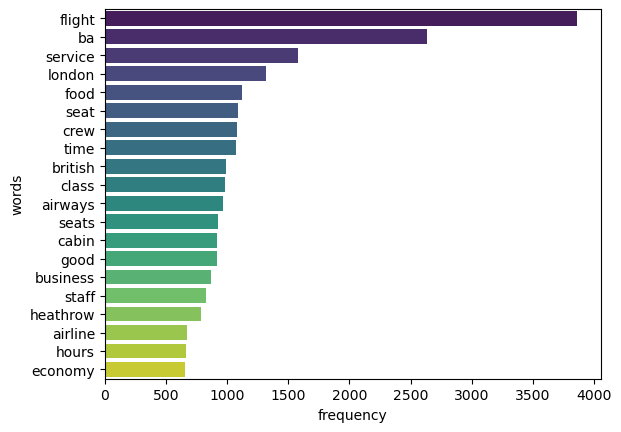

In [72]:
vectorizer = CountVectorizer(max_features=20,stop_words='english')
X = vectorizer.fit_transform(df['cleaned_review'])

word_counts = X.toarray().sum(axis = 0)
words = vectorizer.get_feature_names_out()

freq_df = pd.DataFrame({'words':words,'frequency':word_counts})
freq_df.sort_values(by = 'frequency',ascending = False,inplace = True)
sns.barplot(x='frequency', y='words', data=freq_df, palette='viridis')
plt.show()

In [38]:
words = vectorizer.get_feature_names_out()
for i , topic in enumerate(lda.components_):
    print(f"Topic {i+1}: {', '.join([words[j] for j in topic.argsort()[-10:]])}")

Topic 1: london, service, ba, flight, seats, economy, food, seat, business, class
Topic 2: heathrow, service, cabin, london, time, food, ba, crew, good, flight
Topic 3: london, flights, seats, seat, airways, british, service, airline, flight, ba
Topic 4: service, customer, airways, airport, british, told, london, hours, ba, flight
Topic 5: boarding, passengers, meal, lounge, time, club, service, cabin, crew, flight


# Wordcloud for Visualization

In [58]:
from wordcloud import WordCloud

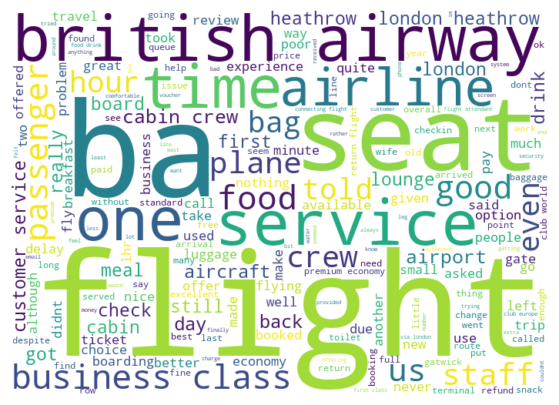

In [42]:
wordcloud = WordCloud(width = 700 ,height = 500,background_color='white').generate(' '.join(df['cleaned_review']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
wordcloud.to_file("wordcloud.png")